In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r'D:\Shakti Foundation\Data Science Project\Movie Genre Classification\data\movie_genre_classification_final.csv')

In [3]:
df.head()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330


In [4]:
df.tail()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
49995,Ocean Call 20,2013,T. Johnson,149,6.8,340904,A touching love story with heartwarming moments.,English,UK,62456512,3291117,Romance,Yash Raj Films,PG-13,Leonardo DiCaprio,18,481
49996,Ocean Call 13,2001,M. Brown,166,7.6,214228,A spine-chilling tale that evokes fear and dread.,Japanese,South Korea,33239921,465759764,Horror,Netflix,PG-13,Emma Watson,3,84
49997,Last Mission 15,2017,J. Smith,158,9.2,251931,A light-hearted comedy that guarantees laughter.,Korean,South Korea,79589169,820566917,Comedy,Paramount Pictures,PG-13,Shah Rukh Khan,1,994
49998,Firestorm 11,1992,J. Smith,166,7.2,487956,A spine-chilling tale that evokes fear and dread.,Mandarin,South Korea,179834680,131779818,Horror,Amazon Studios,R,Kangana Ranaut,10,349
49999,Silent Echo 12,2009,P. Adams,117,4.3,392762,An imaginative world filled with magic and won...,Spanish,France,45434366,957562425,Fantasy,Sony Pictures,PG-13,Emma Watson,20,191


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Director            50000 non-null  object 
 3   Duration            50000 non-null  int64  
 4   Rating              50000 non-null  float64
 5   Votes               50000 non-null  int64  
 6   Description         50000 non-null  object 
 7   Language            50000 non-null  object 
 8   Country             50000 non-null  object 
 9   Budget_USD          50000 non-null  int64  
 10  BoxOffice_USD       50000 non-null  int64  
 11  Genre               50000 non-null  object 
 12  Production_Company  50000 non-null  object 
 13  Content_Rating      50000 non-null  object 
 14  Lead_Actor          50000 non-null  object 
 15  Num_Awards          50000 non-null  int64  
 16  Crit

In [6]:
df.isnull().sum()

Title                 0
Year                  0
Director              0
Duration              0
Rating                0
Votes                 0
Description           0
Language              0
Country               0
Budget_USD            0
BoxOffice_USD         0
Genre                 0
Production_Company    0
Content_Rating        0
Lead_Actor            0
Num_Awards            0
Critic_Reviews        0
dtype: int64

In [7]:
df.shape

(50000, 17)

In [8]:
df.describe()

,Year,Duration,Rating,Votes,Budget_USD,BoxOffice_USD,Num_Awards,Critic_Reviews
count,50000.000000,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000
mean,2001.562620,130.07312,6.926472,249699.050540,9.179143e+07,5.176063e+08,9.964440,500.176380
std,12.722539,29.11097,1.698758,144314.043032,5.823888e+07,2.880283e+08,6.066303,289.971792
min,1980.000000,80.00000,4.000000,516.000000,1.135566e+06,3.291117e+06,0.000000,0.000000
25%,1991.000000,105.00000,5.500000,124531.500000,4.389040e+07,2.590329e+08,5.000000,248.000000
50%,2002.000000,130.00000,6.900000,248582.000000,8.062480e+07,5.109973e+08,10.000000,500.000000
75%,2013.000000,155.00000,8.400000,374833.500000,1.475557e+08,7.704129e+08,15.000000,751.000000
max,2023.000000,180.00000,9.900000,499984.000000,1.984445e+08,9.925159e+08,20.000000,1000.000000


In [9]:
#Detect categorical columns
df.select_dtypes(include='object').columns

Index(['Title', 'Director', 'Description', 'Language', 'Country', 'Genre',
       'Production_Company', 'Content_Rating', 'Lead_Actor'],
      dtype='object')

In [10]:
#Categorical columns value counts
for col in df.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print(df[col].value_counts(), '\n')

--- Title ---
Title
Winds of Fate 6      233
Broken Truth 5       230
Frozen Whisper 14    230
Silent Echo 16       228
Crimson Sky 3        228
                    ... 
Silent Echo 17       156
Frozen Whisper 2     156
Quiet Heart 6        154
City Lights 16       152
Winds of Fate 3      150
Name: count, Length: 260, dtype: int64 

--- Director ---
Director
N. Roy        5141
J. Smith      5054
R. Lee        5011
S. Chen       5005
L. Zhang      4999
P. Adams      4998
M. Brown      4997
A. Khan       4983
D. Patel      4924
T. Johnson    4888
Name: count, dtype: int64 

--- Description ---
Description
A spine-chilling tale that evokes fear and dread.     7260
An emotional journey exploring complex characters.    7187
A touching love story with heartwarming moments.      7169
A suspenseful plot filled with unexpected twists.     7118
A fast-paced thriller with intense action scenes.     7107
An imaginative world filled with magic and wonder.    7100
A light-hearted comedy that guaran

C:\Users\rakkiba\AppData\Local\Temp\ipykernel_21364\1764438510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index,palette="plasma")


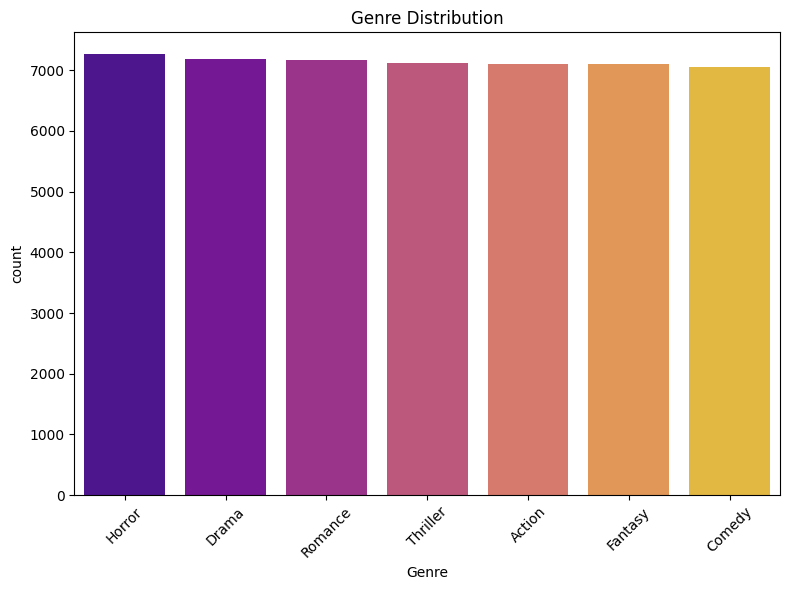

In [11]:
# Genre Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index,palette="plasma")
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

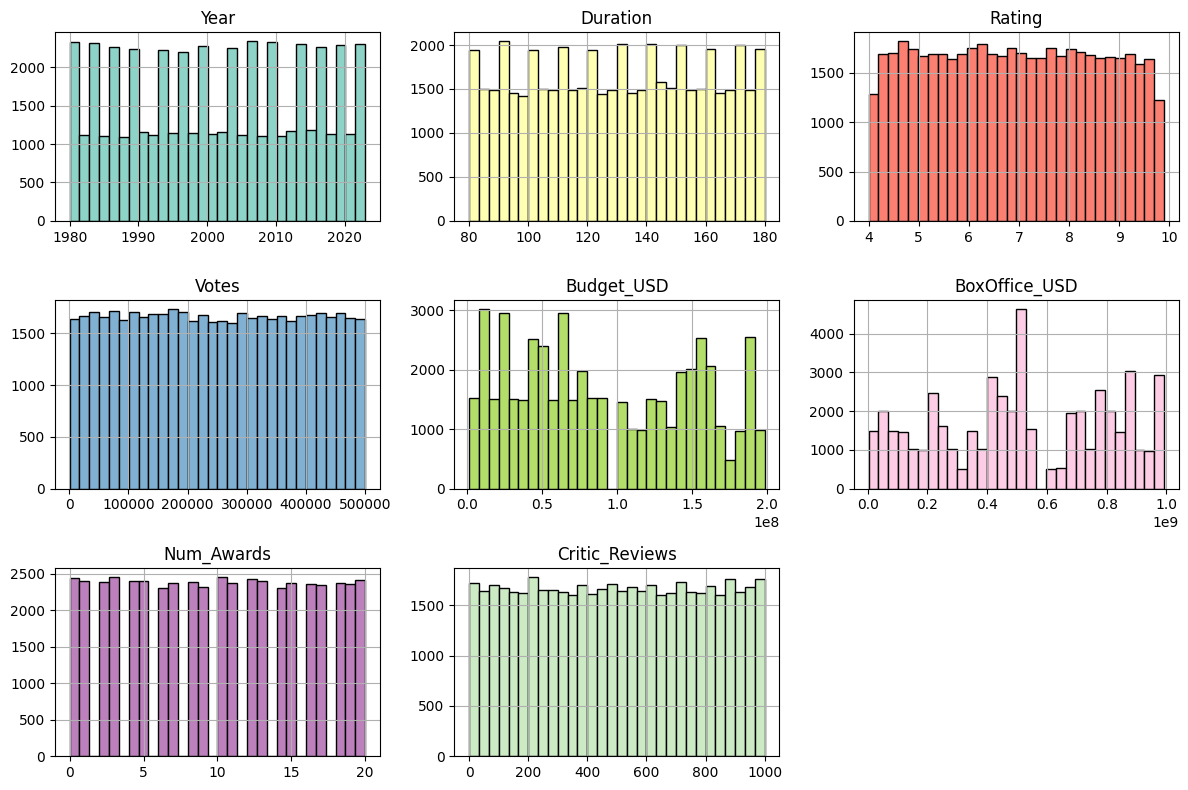

In [12]:
# Histograms
# Create the grid of histograms
axes = df.select_dtypes(include=np.number).hist(bins=30, figsize=(12, 8), edgecolor='black')

# Add color to each subplot
colors = plt.cm.Set3(np.linspace(0, 1, len(axes.flatten())))  # Choose a colormap

for ax, color in zip(axes.flatten(), colors):
    for patch in ax.patches:
        patch.set_facecolor(color)

plt.tight_layout()
plt.show()

C:\Users\rakkiba\AppData\Local\Temp\ipykernel_21364\3349175145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Genre', y=col,palette="Set2")
C:\Users\rakkiba\AppData\Local\Temp\ipykernel_21364\3349175145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Genre', y=col,palette="Set2")
C:\Users\rakkiba\AppData\Local\Temp\ipykernel_21364\3349175145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Genre', y=col,palette="Set2")
C:\Users\rakkiba\AppData\Local\Temp\ipykernel_21364\3349175145.py:6: FutureW

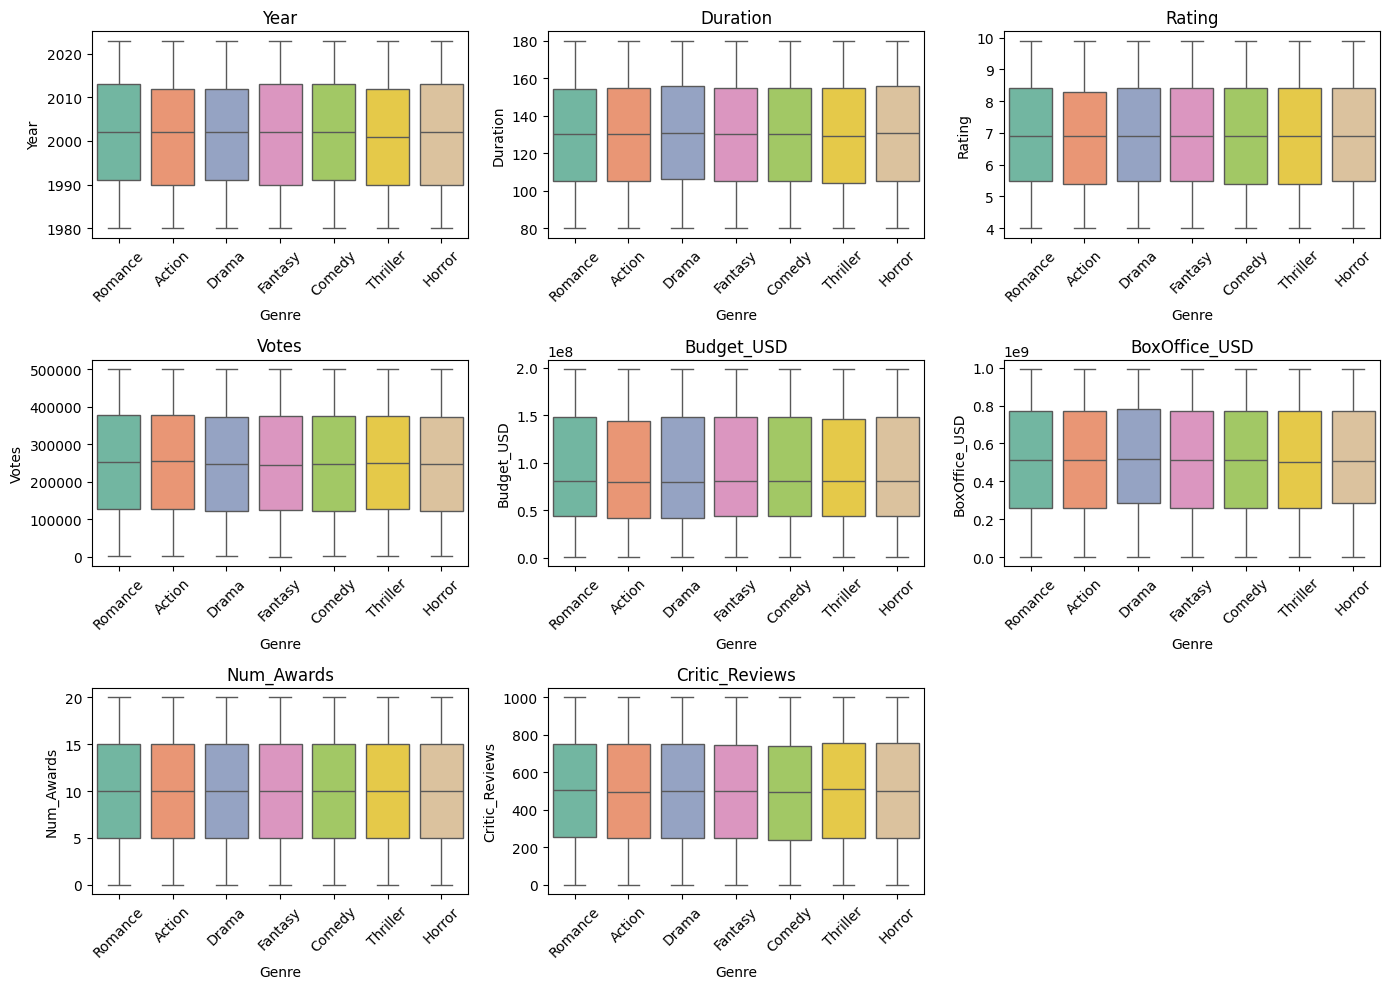

In [13]:
# Boxplots by Genre
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Genre', y=col,palette="Set2")
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

In [14]:
total_movies = df['Title'].value_counts().sum()
print(f'Total number of movies in the dataset: {total_movies}')

Total number of movies in the dataset: 50000


In [15]:
print(df['Description'].head())
print(df['Description'].tail())

0     A touching love story with heartwarming moments.
1    A fast-paced thriller with intense action scenes.
2    A fast-paced thriller with intense action scenes.
3    An emotional journey exploring complex charact...
4    An imaginative world filled with magic and won...
Name: Description, dtype: object
49995     A touching love story with heartwarming moments.
49996    A spine-chilling tale that evokes fear and dread.
49997     A light-hearted comedy that guarantees laughter.
49998    A spine-chilling tale that evokes fear and dread.
49999    An imaginative world filled with magic and won...
Name: Description, dtype: object


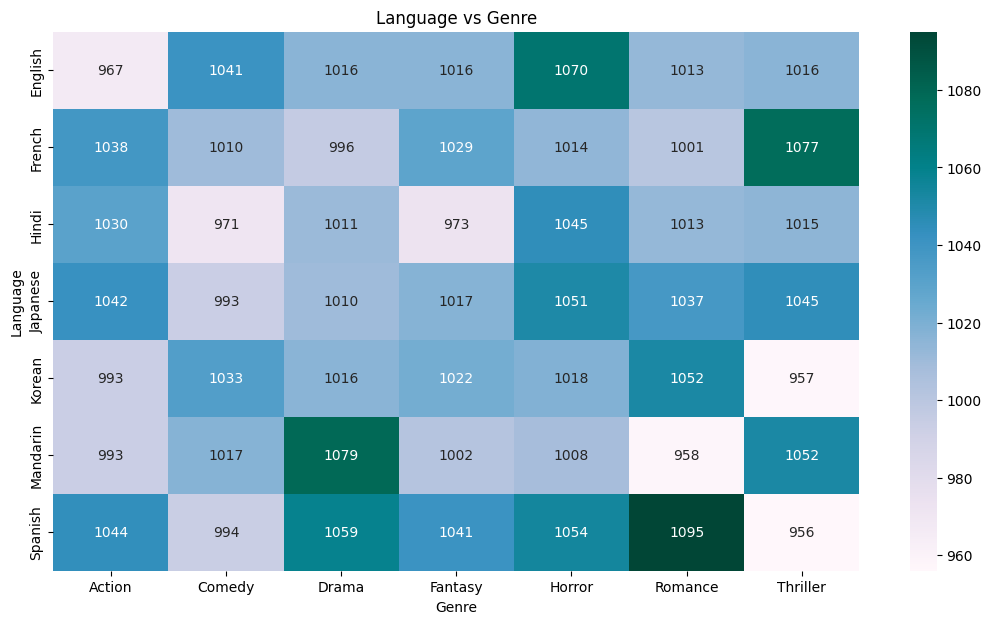

In [16]:
# Language vs Genre Heatmap
lang_genre = pd.crosstab(df['Language'], df['Genre'])
plt.figure(figsize=(13, 7))
sns.heatmap(lang_genre, annot=True, fmt='d', cmap='PuBuGn')
plt.title("Language vs Genre")
plt.show()

In [17]:
#Highest Box Office Collection
classifi_usd=df.groupby(["Title","Genre"])["BoxOffice_USD"].sum().sort_values(ascending=False).reset_index().head(10)
classifi_usdd=classifi_usd
classifi_usdd.style.background_gradient(cmap="Reds") 

,Title,Genre,BoxOffice_USD
0,Silent Echo 6,Drama,24939168515
1,Eternal Love 3,Fantasy,24393129481
2,City Lights 2,Fantasy,23811351438
3,Broken Truth 2,Horror,23347802352
4,Ocean Call 1,Horror,23158570897
5,Lost World 19,Thriller,23155134217
6,Broken Truth 11,Action,23149691857
7,Ocean Call 10,Thriller,23133397955
8,Broken Truth 20,Romance,22920923007
9,Broken Truth 6,Fantasy,22717786962


In [18]:
#Budget vs Box Office
classifi_coll=df.groupby("Title")[["Budget_USD","BoxOffice_USD"]].sum().sort_values(by=["Budget_USD","BoxOffice_USD"],ascending=False).reset_index().head(20)
classifi_collection=classifi_coll.style.background_gradient(cmap="cividis")  # Using cividis colormap for better visibility
classifi_collection

,Title,Budget_USD,BoxOffice_USD
0,Winds of Fate 6,22249784035,119880524848
1,Firestorm 13,22148727585,106519593874
2,Firestorm 4,21977739973,114747462899
3,Winds of Fate 19,21962988326,114448684008
4,Crimson Sky 1,21378800993,110966179543
5,Winds of Fate 8,21293944246,110963257485
6,Crimson Sky 3,21159487695,106604108323
7,Quiet Heart 1,21133629705,106198927677
8,Firestorm 15,20634462794,114304872586
9,Ocean Call 1,20619606244,115568882608
